<a href="https://colab.research.google.com/github/younghoonNa/pythonDT/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_4%EC%9D%BC%EC%B0%A8_%EC%9B%A8%EC%9D%B4%ED%8D%BC_%EB%B6%88%EB%9F%89_%EC%9C%A0%ED%98%95_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wafer Map Defect Classification

## 프로젝트 개요
반도체 공정에서 생성되는 웨이퍼 맵 데이터는 엔지니어가 불량의 원인을 식별하는 데 중요한 세부 정보를 제공합니다. 이러한 불량 패턴을 자동으로 식별하여 반도체 공정에서 웨이퍼 생산 공정을 개선할 수 있습니다.

본 프로젝트에서는 1만6천장의 이미지 데이터를 기반으로 웨이퍼 맵의 불량을 자동으로 분류하는 검사기를 만들고자 합니다.

아래의 이미지는 학습 데이터에서 시각화 한 예시로 이미지의 제목은 불량 유형을 의미합니다.

이미지에서 노란색 Pixel은 정상 다이(Die, 1) 검은색 Pixel은 비정상 다이(Die, 2)를 의미합니다.

![img](https://i.imgur.com/3nBXUU7_d.webp?maxwidth=760&fidelity=grand)


## 데이터 설명
#### 파일 구조
- train.csv
    - 학습을 위하여 활용되는 데이터 셋입니다.
- test.csv
    - 테스트를 위하여 제공되는 데이터 셋입니다.
- submission.csv
    - 예측한 불량 유형을 submission 파일에 작성한 후 제출합니다.

#### 데이터 구조 설명
- lotName : Lot 이름
- waferId : 해당 Lot에서의 Wafer 순서
- dieSize : 다이(Die)의 개수
- pixel_1 ~ pixcel 676 : 다이(Die)에 대한 정보
  - 0 : 26 x 26 이미지 형태를 유지를 위한 정보
  - 1 : 정상 Die 
  - 2 : 비정상 Die
- label : 불량 유형
    - 0: 'Center'
    - 1: 'Donut'
    - 2: 'Edge-Loc'
    - 3: 'Edge-Ring'
    - 4: 'Loc'
    - 5: 'Near-full'
    - 6: 'Random'
    - 7: 'Scratch'
    - 8: 'none'


## 프로젝트 구성
* 데이터 로드 (load data, train.csv, test.csv)
* 데이터 전처리 및 특성 공학 (train.csv, test.csv)
* 모델 생성 및 검증 (train.csv)
* 평가 데이터 예측 (test.csv)
* 결과 제출 및 점수 확인

## 제출 이력 및 순위 조회
[평가시스템](http://manage.jaen.kr)에 접속하여 확인 가능
> 로그인 -> 프로젝트 -> 웨이퍼 맵 불량 유형 분류 -> 리더보드

### 접속 정보
- ID : 본인이메일
- PWD : hl1227

## 환경 설정

In [ ]:
!wget http://49.247.133.7/ws1.zip

--2021-12-30 08:20:03--  http://49.247.133.7/ws1.zip
Connecting to 49.247.133.7:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3194445 (3.0M) [application/zip]
Saving to: ‘ws1.zip.1’

ws1.zip.1           100%[===================>]   3.05M  3.28MB/s    in 0.9s    

2021-12-30 08:20:04 (3.28 MB/s) - ‘ws1.zip.1’ saved [3194445/3194445]



In [ ]:
!unzip ws1.zip -y

Archive:  ws1.zip
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission.csv          
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
!pip install jaen

In [ ]:
from JAEN.project import Project
pjt = Project('웨이퍼 맵 불량 유형 분류', 
              '한림대-데이터분석과정_전공자',        
              '1차수 A반',       
              'yh07280@naver.com')

## 모듈 import 
필요한 모듈을 import 합니다. 필요에 따라 추가 패키지를 load 할 수 있습니다.

In [ ]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data 경로 설정
DATA_DIR = 'data'

# train 데이터셋 로드 (train.csv)
train = pd.read_csv('train.csv')
                                 
# test 데이터셋 로드 (test.csv)
test = pd.read_csv('test.csv')

# submission 파일 로드 (submission.csv)
submission = pd.read_csv('submission.csv')

2개의 데이터 셋트를 나누어 제공합니다.
1. train: 학습용 데이터 세트. 정답 값이라고 할 수 있는 `label` 값이 같이 제공됩니다.
2. test: 예측용 데이터 세트. 정답 값이 빠진 `feature` 들만 제공됩니다. 우리는 이 `feature`를 활용하여 예측을 진행합니다.
3. submission: 정답 제출용 데이터 세트. 주어진 형식에 맞춰 정답 값을 기입하고 제출합니다.

In [ ]:
# 코드를 입력해 주세요
# 학습 데이터 조회
train.head()

,lotName,waferId,dieSize,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,...,pixel_638,pixel_639,pixel_640,pixel_641,pixel_642,pixel_643,pixel_644,pixel_645,pixel_646,pixel_647,pixel_648,pixel_649,pixel_650,pixel_651,pixel_652,pixel_653,pixel_654,pixel_655,pixel_656,pixel_657,pixel_658,pixel_659,pixel_660,pixel_661,pixel_662,pixel_663,pixel_664,pixel_665,pixel_666,pixel_667,pixel_668,pixel_669,pixel_670,pixel_671,pixel_672,pixel_673,pixel_674,pixel_675,pixel_676,label
0,lot7,1,533.0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,...,1,1,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,8
1,lot7,2,533.0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,...,1,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,8
2,lot7,3,533.0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,...,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0,8
3,lot7,4,533.0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,2,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,8
4,lot7,5,533.0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,2,0,0,0,0,0,0,0,0,0,0,8


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lotName</th>
      <th>waferId</th>
      <th>dieSize</th>
      <th>pixel_1</th>
      <th>pixel_2</th>
      <th>pixel_3</th>
      <th>pixel_4</th>
      <th>pixel_5</th>
      <th>pixel_6</th>
      <th>pixel_7</th>
      <th>...</th>
      <th>pixel_668</th>
      <th>pixel_669</th>
      <th>pixel_670</th>
      <th>pixel_671</th>
      <th>pixel_672</th>
      <th>pixel_673</th>
      <th>pixel_674</th>
      <th>pixel_675</th>
      <th>pixel_676</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>lot7</td>
      <td>1</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lot7</td>
      <td>2</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
    <tr>
      <th>2</th>
      <td>lot7</td>
      <td>3</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
    <tr>
      <th>3</th>
      <td>lot7</td>
      <td>4</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
    <tr>
      <th>4</th>
      <td>lot7</td>
      <td>5</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
  </tbody>
</table>
<p>5 rows × 680 columns</p>
</div>

In [ ]:
# 코드를 입력해 주세요
# 테스트 데이터 조회
test.head()

,lotName,waferId,dieSize,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,...,pixel_637,pixel_638,pixel_639,pixel_640,pixel_641,pixel_642,pixel_643,pixel_644,pixel_645,pixel_646,pixel_647,pixel_648,pixel_649,pixel_650,pixel_651,pixel_652,pixel_653,pixel_654,pixel_655,pixel_656,pixel_657,pixel_658,pixel_659,pixel_660,pixel_661,pixel_662,pixel_663,pixel_664,pixel_665,pixel_666,pixel_667,pixel_668,pixel_669,pixel_670,pixel_671,pixel_672,pixel_673,pixel_674,pixel_675,pixel_676
0,lot7,9,533.0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,...,1,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0
1,lot7,10,533.0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,...,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,2,2,1,0,0,0,0,0,0,0,0,0,0
2,lot7,12,533.0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,lot7,14,533.0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,...,2,1,2,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0
4,lot7,16,533.0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,...,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lotName</th>
      <th>waferId</th>
      <th>dieSize</th>
      <th>pixel_1</th>
      <th>pixel_2</th>
      <th>pixel_3</th>
      <th>pixel_4</th>
      <th>pixel_5</th>
      <th>pixel_6</th>
      <th>pixel_7</th>
      <th>...</th>
      <th>pixel_667</th>
      <th>pixel_668</th>
      <th>pixel_669</th>
      <th>pixel_670</th>
      <th>pixel_671</th>
      <th>pixel_672</th>
      <th>pixel_673</th>
      <th>pixel_674</th>
      <th>pixel_675</th>
      <th>pixel_676</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>lot7</td>
      <td>9</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lot7</td>
      <td>10</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>lot7</td>
      <td>12</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>lot7</td>
      <td>14</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>lot7</td>
      <td>16</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>5 rows × 679 columns</p>
</div>

In [ ]:
# 코드를 입력해 주세요
# 정답 제출용 데이터 조회
submission.head()

,lotName,label
0,lot7,0
1,lot7,0
2,lot7,0
3,lot7,0
4,lot7,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lotName</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
# 코드를 입력해 주세요
# train 데이터 프레임의 lotName별 데이터의 개수를 확인하세요.
train['lotName'].value_counts()

lot40483    25
lot42164    25
lot40490    25
lot42160    25
lot40455    25
            ..
lot8344      1
lot10992     1
lot22216     1
lot13087     1
lot16433     1
Name: lotName, Length: 743, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>lot40341    25
lot42163    25
lot42177    25
lot40461    25
lot42127    25
            ..
lot10638     1
lot10992     1
lot10971     1
lot10587     1
lot7654      1
Name: lotName, Length: 743, dtype: int64</pre>

In [ ]:
# 코드를 입력해 주세요
# lotName의 개수 결과를 대상으로 한번 더 데이터의 개수를 확인하세요. 
train['lotName'].value_counts().value_counts()

25    150
24     95
23     83
22     71
21     65
1      59
20     50
19     28
18     23
17     19
14     18
15     14
13     14
16     12
12     10
11     10
3       6
6       5
2       4
10      3
4       2
7       1
5       1
Name: lotName, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>25    150
24     95
23     83
22     71
21     65
1      59
20     50
19     28
18     23
17     19
14     18
15     14
13     14
16     12
12     10
11     10
3       6
6       5
2       4
10      3
4       2
7       1
5       1
Name: lotName, dtype: int64</pre>

In [ ]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. (먼저 인덱스를 기준으로 데이터를 정렬하세요)
lotName_train = train['lotName'].value_counts().value_counts()
lotName_train = lotName_train.reset_index().sort_values('index')
lotName_train

,index,lotName
5,1,59
18,2,4
16,3,6
20,4,2
22,5,1
17,6,5
21,7,1
19,10,3
15,11,10
14,12,10


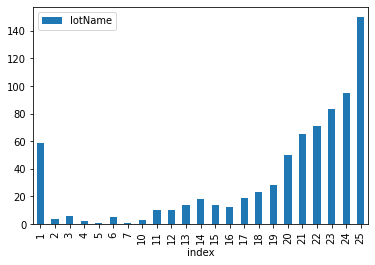

In [ ]:
lotName_train.plot(kind='bar', x='index', y='lotName')

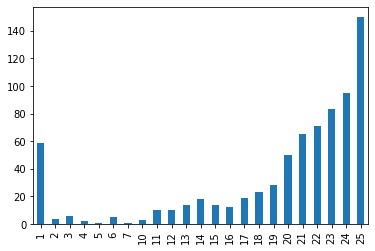

In [ ]:
# 코드를 입력해 주세요
# test 데이터 프레임의 lotName별 데이터의 개수를 확인하세요.
test['lotName'].value_counts()

lot12126    25
lot8347     25
lot12083    25
lot7593     25
lot12116    25
            ..
lot1622      1
lot40365     1
lot85        1
lot117       1
lot40500     1
Name: lotName, Length: 1151, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>lot7578     25
lot12065    25
lot12018    25
lot10619    25
lot12143    25
            ..
lot249       1
lot221       1
lot275       1
lot157       1
lot149       1
Name: lotName, Length: 1151, dtype: int64</pre>

In [ ]:
# 코드를 입력해 주세요
# lotName의 개수 결과를 대상으로 한번 더 데이터의 개수를 확인하세요. 
test['lotName'].value_counts().value_counts()

25    349
1     127
2     100
24     93
3      71
4      71
5      53
6      34
12     33
13     27
7      26
23     25
8      24
11     20
10     16
22     15
9      13
14     11
20     11
15      8
18      8
19      7
17      4
21      4
16      1
Name: lotName, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>25    349
1     127
2     100
24     93
3      71
4      71
5      53
6      34
12     33
13     27
7      26
23     25
8      24
11     20
10     16
22     15
9      13
14     11
20     11
15      8
18      8
19      7
17      4
21      4
16      1
Name: lotName, dtype: int64</pre>

In [ ]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. (먼저 인덱스를 기준으로 데이터를 정렬하세요)
lotName_test = test['lotName'].value_counts().value_counts()
lotName_test = lotName_test.reset_index().sort_values('index')
lotName_test

,index,lotName
1,1,127
2,2,100
4,3,71
5,4,71
6,5,53
7,6,34
10,7,26
12,8,24
16,9,13
14,10,16


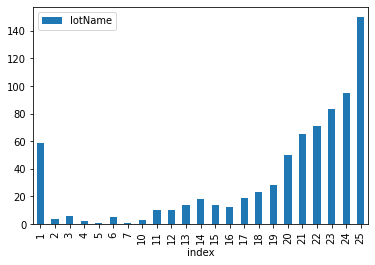

In [ ]:
lotName_train.plot(kind='bar', x='index', y='lotName')

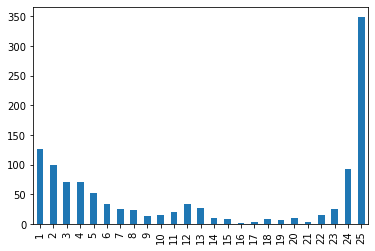

In [ ]:
# 코드를 입력해 주세요
# train 데이터 프레임의 waferId별 데이터의 개수를 확인하세요.
train['waferId'].value_counts()

2     589
3     589
10    582
18    582
4     581
8     579
1     579
16    578
14    577
25    577
23    575
22    575
19    575
15    574
13    574
17    574
24    572
11    570
5     570
6     570
12    569
7     569
9     564
20    562
21    560
Name: waferId, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>2     589
3     589
10    582
18    582
4     581
8     579
1     579
16    578
14    577
25    577
23    575
22    575
19    575
15    574
13    574
17    574
24    572
11    570
5     570
6     570
12    569
7     569
9     564
20    562
21    560
Name: waferId, dtype: int64</pre>

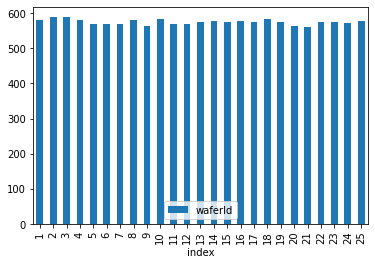

In [ ]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. (먼저 인덱스를 기준으로 데이터를 정렬하세요)
waferId_train = train['waferId'].value_counts().reset_index().sort_values('index')
waferId_train.plot(kind='bar', x='index', y='waferId')

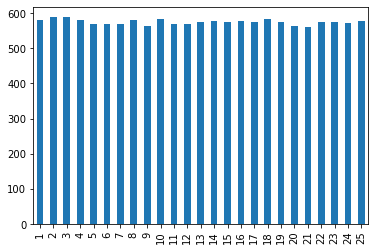

In [ ]:
# 코드를 입력해 주세요
# test 데이터 프레임의 waferId별 데이터의 개수를 확인하세요.
test['waferId'].value_counts()

1     730
2     682
5     678
6     673
4     671
7     668
9     665
3     665
12    658
11    658
8     655
10    647
13    635
15    614
14    611
17    607
16    607
20    606
21    600
19    595
18    595
22    580
23    571
24    553
25    488
Name: waferId, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>1     730
2     682
5     678
6     673
4     671
7     668
9     665
3     665
12    658
11    658
8     655
10    647
13    635
15    614
14    611
17    607
16    607
20    606
21    600
19    595
18    595
22    580
23    571
24    553
25    488
Name: waferId, dtype: int64</pre>

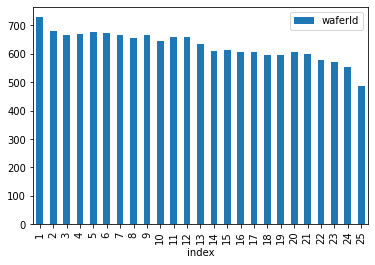

In [ ]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. (먼저 인덱스를 기준으로 데이터를 정렬하세요)
waferId_test = test['waferId'].value_counts().reset_index().sort_values('index')
waferId_test.plot(kind='bar', x='index', y='waferId')

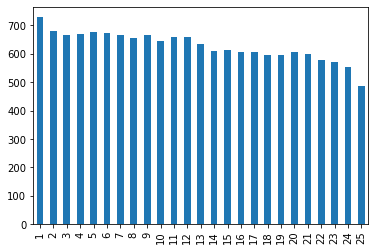

In [ ]:
# 코드를 입력해 주세요
# train 데이터의 label 컬럼의 개수를 계산하세요
train['label'].value_counts()

8    13489
4      297
2      296
0       90
6       74
7       72
3       31
5       16
1        1
Name: label, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>8    13489
4      297
2      296
0       90
6       74
7       72
3       31
5       16
1        1
Name: label, dtype: int64</pre>

In [ ]:
# 코드를 입력해주세요
# 아래의 정보를 참고하여 label_name 컬럼을 생성하세요.
# (0 -> Center), (1 -> Donut), (2 -> Edge-Loc), (3 -> Edge-Ring), (4 -> Loc), (5 -> Near-full),(6 -> Random), (7 -> Scratch), (8 -> none)
def rename(x):
    data = {
        0: 'Center', 1: 'Donut', 2: 'Edge-Loc',
        3: 'Edge-Ring', 4: 'Loc', 5: 'Near-full',
        6: 'Random', 7: 'Scratch', 8: 'none'
    } 
    return data[x]
train['label_name'] = train['label'].apply(rename)
train['label_name']

0        none
1        none
2        none
3        none
4        none
         ... 
14361    none
14362    none
14363    none
14364    none
14365    none
Name: label_name, Length: 14366, dtype: object

In [ ]:
# 코드를 입력해 주세요
# train 데이터의 label_name 컬럼의 개수를 계산하세요
train['label_name'].value_counts()

none         13489
Loc            297
Edge-Loc       296
Center          90
Random          74
Scratch         72
Edge-Ring       31
Near-full       16
Donut            1
Name: label_name, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>none         13489
Loc            297
Edge-Loc       296
Center          90
Random          74
Scratch         72
Edge-Ring       31
Near-full       16
Donut            1
Name: label_name, dtype: int64</pre>

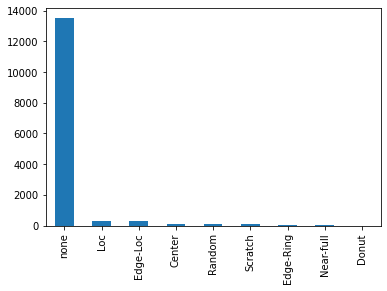

In [ ]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. 
train['label_name'].value_counts().plot(kind='bar')

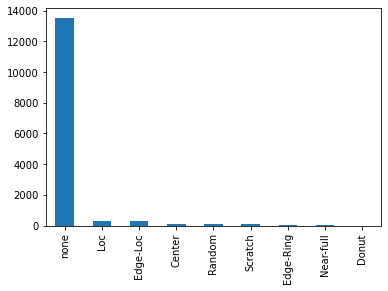

In [ ]:
# 코드를 입력해 주세요
# train 데이터 프레임에 컬럼명에 pixel 이라는 문자열이 있는 컬럼명만 선택하여 X에 저장하세요.
list_px = train.columns
list_px

X = []
for i in list_px:
  if (i[0:5] == 'pixel'):
    X.append(i)

new_X = train[X]
new_X

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,pixel_40,...,pixel_637,pixel_638,pixel_639,pixel_640,pixel_641,pixel_642,pixel_643,pixel_644,pixel_645,pixel_646,pixel_647,pixel_648,pixel_649,pixel_650,pixel_651,pixel_652,pixel_653,pixel_654,pixel_655,pixel_656,pixel_657,pixel_658,pixel_659,pixel_660,pixel_661,pixel_662,pixel_663,pixel_664,pixel_665,pixel_666,pixel_667,pixel_668,pixel_669,pixel_670,pixel_671,pixel_672,pixel_673,pixel_674,pixel_675,pixel_676
0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,1,2,1,...,1,1,1,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,1,1,...,1,1,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,1,1,...,1,2,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,...,1,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14361,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,1,2,1,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0
14362,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0
14363,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,2,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0
14364,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,...,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pixel_1</th>
      <th>pixel_2</th>
      <th>pixel_3</th>
      <th>pixel_4</th>
      <th>pixel_5</th>
      <th>pixel_6</th>
      <th>pixel_7</th>
      <th>pixel_8</th>
      <th>pixel_9</th>
      <th>pixel_10</th>
      <th>...</th>
      <th>pixel_667</th>
      <th>pixel_668</th>
      <th>pixel_669</th>
      <th>pixel_670</th>
      <th>pixel_671</th>
      <th>pixel_672</th>
      <th>pixel_673</th>
      <th>pixel_674</th>
      <th>pixel_675</th>
      <th>pixel_676</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>14361</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14362</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14363</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14364</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14365</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>14366 rows × 676 columns</p>
</div>

In [ ]:
# 코드를 입력해 주세요.
# X 데이터를 Numpy Array로 변경하여 (14366, 26, 26) 으로 shape을 변경하세요. (images변수에 저장하세요.)
new_X = np.array(new_X)
images = new_X.reshape(14366, 26, 26)
images.shape

(14366, 26, 26)

<p><strong>[출력 결과]</strong></p><pre>(14366, 26, 26)</pre>

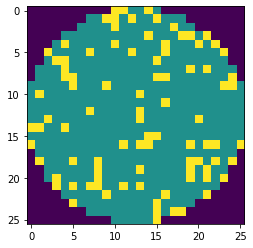

In [ ]:
# 코드를 입력해 주세요.
# images 변수의 첫번째 데이터를 선택하여 시각화 하세요 (plt.imshow 함수 이용)
plt.imshow(images[0])

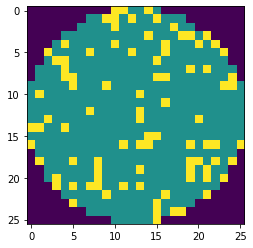

In [ ]:
# 각 레이블별 데이터 1개씩 추출
info = [[label, train[train['label_name'] == label].index[0]] for label in train['label_name'].unique()]
info

[['none', 0],
 ['Edge-Ring', 27],
 ['Edge-Loc', 99],
 ['Scratch', 392],
 ['Random', 395],
 ['Center', 397],
 ['Loc', 432],
 ['Near-full', 668],
 ['Donut', 10686]]

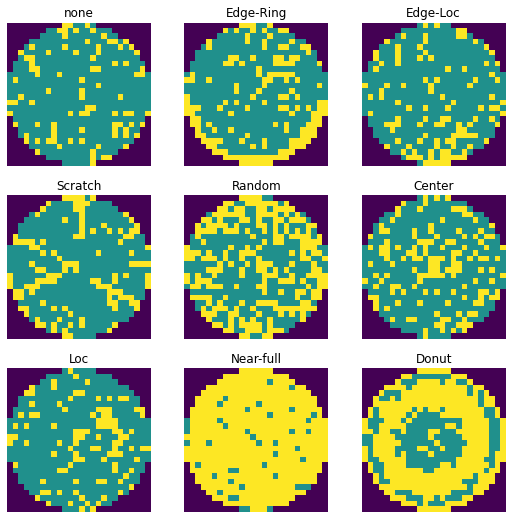

In [ ]:
# 코드를 입력해 주세요.
# 위의 info 변수를 이용하여 각 레이블별 웨이퍼맵을 시각화 하세요.
plt.figure(figsize=(9, 9))
for cnt, (name, index) in enumerate(info):
    plt.subplot(3, 3, cnt+1)
    plt.imshow(images[index])
    plt.title(name)
    plt.axis('off')
plt.show()

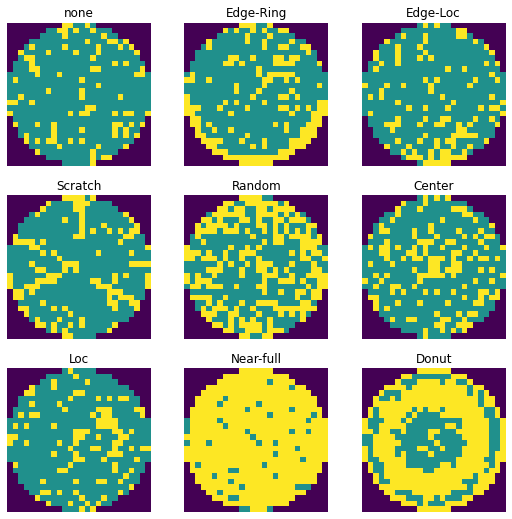

In [ ]:
# 코드를 입력해 주세요
# label 컬럼을 Y에 저장하세요.
y = train['label']

<p><strong>[출력 결과]</strong></p><pre>0        8
1        8
2        8
3        8
4        8
        ..
14361    8
14362    8
14363    8
14364    8
14365    8
Name: label, Length: 14366, dtype: int64</pre>

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(new_X)
X_scaled = scaler.transform(new_X)

In [ ]:
# 코드를 입력해 주세요
# 분리된 X와 Y를 Train과 Test로 분할하세요.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 23, test_size = 0.05)

In [ ]:
# 코드를 입력해 주세요
# KNN 알고리즘을 이용하여 모델링하고 성능을 출력하세요. (K는 9로 지정하세요.)

# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors=1)
# model.fit(X_scaled, y_train)

In [ ]:


# parameters = {
#     #kernal = "rbf" 고정
#     "kernel": ["rbf"],
#     #C 값은 다양하게 소프트 마진부터 라지마진까지
#     "C": [10, 100],
#     #복잡도도 낮지 않게 설정
#     "gamma" : [8],
#     #coef0 rbf에 대한 kernal 계수
#     "coef0" : [0.01]
#     }

# #SVR 모델 Grid Search , 파라메타들은 위에서 설정한 파라메타
# #verbose = 2 -> Grid Search 반복시 하이퍼 파라메타별 메시지를 화면에 출력 
# #cv=5 5번의 교차검증.
# grid = GridSearchCV(SVR(), parameters, verbose=2, cv=5)
# grid.fit(new_X, y)

In [ ]:
# grid.best_params_

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm_rbf_clf =  SVC(kernel="rbf")
svm_rbf_clf.fit(X_scaled, y)

In [ ]:
# x_train, x_test, y_train, y_test  = train_test_split(new_X , y,random_state = 23)

# k_range = range(3,20)

# train_acc = []
# test_acc = []

# for k in k_range:
#   model = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
#   train_acc.append(model.score(x_train, y_train))
#   test_acc.append(model.score(x_test, y_test))

In [ ]:
# # 실험 결과 시각화
# plt.figure(figsize=(30,15))
# plt.plot(k_range[:20], train_acc[:20], label='Train Accuracy')
# plt.plot(k_range[:20], test_acc[:20], label='Test Accuracy')
# plt.legend()
# plt.grid()
# plt.xticks(k_range[:20])
# plt.show()

In [ ]:
#test_size 0.3 일 때 정확도 0.9454, 0.9464
#test_size 0.2 일 때 정확도 0.945, 0.947
#test_size 0.1 일 때 정확도 0.94562, 0.9540
#test_size 0.05 일 때 정확도 0.9464, 0.9527


model.score(x_train, y_train), model.score(x_test, y_test)

<p><strong>[출력 결과]</strong></p><pre>(0.946723593837015, 0.9457126948775055)</pre>

In [ ]:
# 코드를 입력해 주세요
# test 데이터 프레임에 컬럼명에 pixel 이라는 문자열이 있는 컬럼명만 선택하여 X2에 저장하세요.
t_list_px = test.columns
t_list_px

X = []
for i in t_list_px:
  if (i[0:5] == 'pixel'):
    X.append(i)

test_X = test[X]
test_X

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pixel_1</th>
      <th>pixel_2</th>
      <th>pixel_3</th>
      <th>pixel_4</th>
      <th>pixel_5</th>
      <th>pixel_6</th>
      <th>pixel_7</th>
      <th>pixel_8</th>
      <th>pixel_9</th>
      <th>pixel_10</th>
      <th>...</th>
      <th>pixel_667</th>
      <th>pixel_668</th>
      <th>pixel_669</th>
      <th>pixel_670</th>
      <th>pixel_671</th>
      <th>pixel_672</th>
      <th>pixel_673</th>
      <th>pixel_674</th>
      <th>pixel_675</th>
      <th>pixel_676</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>15707</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>15708</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>15709</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>15710</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>15711</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>15712 rows × 676 columns</p>
</div>

In [ ]:
# 코드를 입력해 주세요
# X2 데이터 프레임을 예측하여 submission 데이터 프레임의 label 컬럼에 추가하세요.

from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(new_X)
# X_scaled = scaler.transform(new_X)

scaler.fit(test_X)
X_scaled_test = scaler.transform(test_X)

pred_x2 = model.predict(X_scaled_test)
pred_x2

In [ ]:
submission['label'] = pred_x2
submission

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lotName</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>2</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>3</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>4</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>15707</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
    <tr>
      <th>15708</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
    <tr>
      <th>15709</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
    <tr>
      <th>15710</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
    <tr>
      <th>15711</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
  </tbody>
</table>
<p>15712 rows × 2 columns</p>
</div>

# 순서대로 평가가 진행됩니다. 실행은 1회만 해주세요.

- 느리다고 중지 후 다시 평가 코드를 실행하는 경우 제출 과정에서 패널티가 발생할 수 있습니다. (제출 횟수 이슈 발생 가능)

In [ ]:
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-08-41-39.csv
제출 여부 :success
오늘 제출 횟수 : 10
제출 결과:0.9246684730246849


In [ ]:
#1차 0.8896 -> test size 0.1
#3차 0.8899 -> test size 0.005

# 축하드립니다. 모델의 성능을 개선하여 더 좋은 점수를 획득해보세요!